In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
USA=pd.read_csv("USA_Housing.csv")

In [7]:
USA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
USA['Address']=le.fit_transform(USA['Address'])

In [9]:
USA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   int32  
dtypes: float64(6), int32(1)
memory usage: 254.0 KB


In [10]:
USA.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [14]:
X=USA[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population','Address']]
Y=USA['Price']

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=44)

In [19]:
USA.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06,2499.500000
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05,1443.520003
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04,0.000000
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05,1249.750000
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06,2499.500000
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06,3749.250000
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06,4999.000000


In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lm=LinearRegression()

In [22]:
lm.fit(X_train,Y_train)

LinearRegression()

In [23]:
print(lm.intercept_)

-2634429.9622099004


In [24]:
print(lm.coef_)

[ 2.14774826e+01  1.67009640e+05  1.20657958e+05  2.17537020e+03
  1.50869820e+01 -8.28133017e-01]


In [25]:
prediction=lm.predict(X_test)

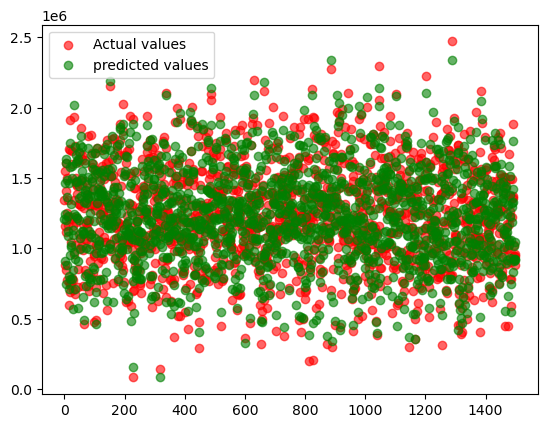

In [26]:
plt.scatter(range(len(Y_test)),Y_test,color='red',alpha=0.6,label='Actual values')
plt.scatter(range(len(prediction)),prediction,color='green',alpha=0.6,label='predicted values')
plt.legend()

In [30]:
from sklearn import metrics

In [31]:
print('MAE:',metrics.mean_absolute_error(Y_test,prediction))
print('MSE:',metrics.mean_squared_error(Y_test,prediction))
print('RMSE:',metrics.root_mean_squared_error(Y_test,prediction))
print('R2_Score:',metrics.r2_score(Y_test,prediction))

MAE: 79476.25922345914
MSE: 9751576686.363316


AttributeError: module 'sklearn.metrics' has no attribute 'root_mean_squared_error'

In [32]:
USA.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,4750
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,4636
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,1897
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,4833
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,1703


In [34]:
print(lm.predict([[63390,7,5,2,33266,1897]]))

[1004048.24542089]


C:\Users\Admin-16\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [36]:
USA.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64